# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Install required libraries
%pip install pandas numpy seaborn matplotlib

# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot styling
print(plt.style.available)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis')
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Use the relative path to the file

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Step 1: Aggregate data by year
yearly_data = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Step 2: Sort values by year to ensure chronological order
yearly_data = yearly_data.sort_values('Year')

# Step 3: Display basic information about the aggregated dataset
print("Shape of aggregated data:", yearly_data.shape)
print("\nFirst few rows of aggregated data:")
display(yearly_data.head())
print("\nSummary statistics:")
display(yearly_data.describe())

Shape of aggregated data: (124, 5)

First few rows of aggregated data:


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691



Summary statistics:


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1961.500000,14.499538,350.028626,149.988859,9.000886
std,35.939764,0.009960,0.456535,1.032095,0.037547
min,1900.000000,14.474559,348.642249,148.051748,8.893453
25%,1930.750000,14.492782,349.691692,149.207437,8.978851
50%,1961.500000,14.499496,350.022334,149.918062,8.998274
75%,1992.250000,14.504872,350.367023,150.560328,9.027985
max,2023.000000,14.527762,351.003294,152.671944,9.101611


## 2. Univariate Analysis

Analyze each climate variable independently.

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1961.500000,14.499538,350.028626,149.988859,9.000886
std,35.939764,0.009960,0.456535,1.032095,0.037547
min,1900.000000,14.474559,348.642249,148.051748,8.893453
25%,1930.750000,14.492782,349.691692,149.207437,8.978851
50%,1961.500000,14.499496,350.022334,149.918062,8.998274
75%,1992.250000,14.504872,350.367023,150.560328,9.027985
max,2023.000000,14.527762,351.003294,152.671944,9.101611


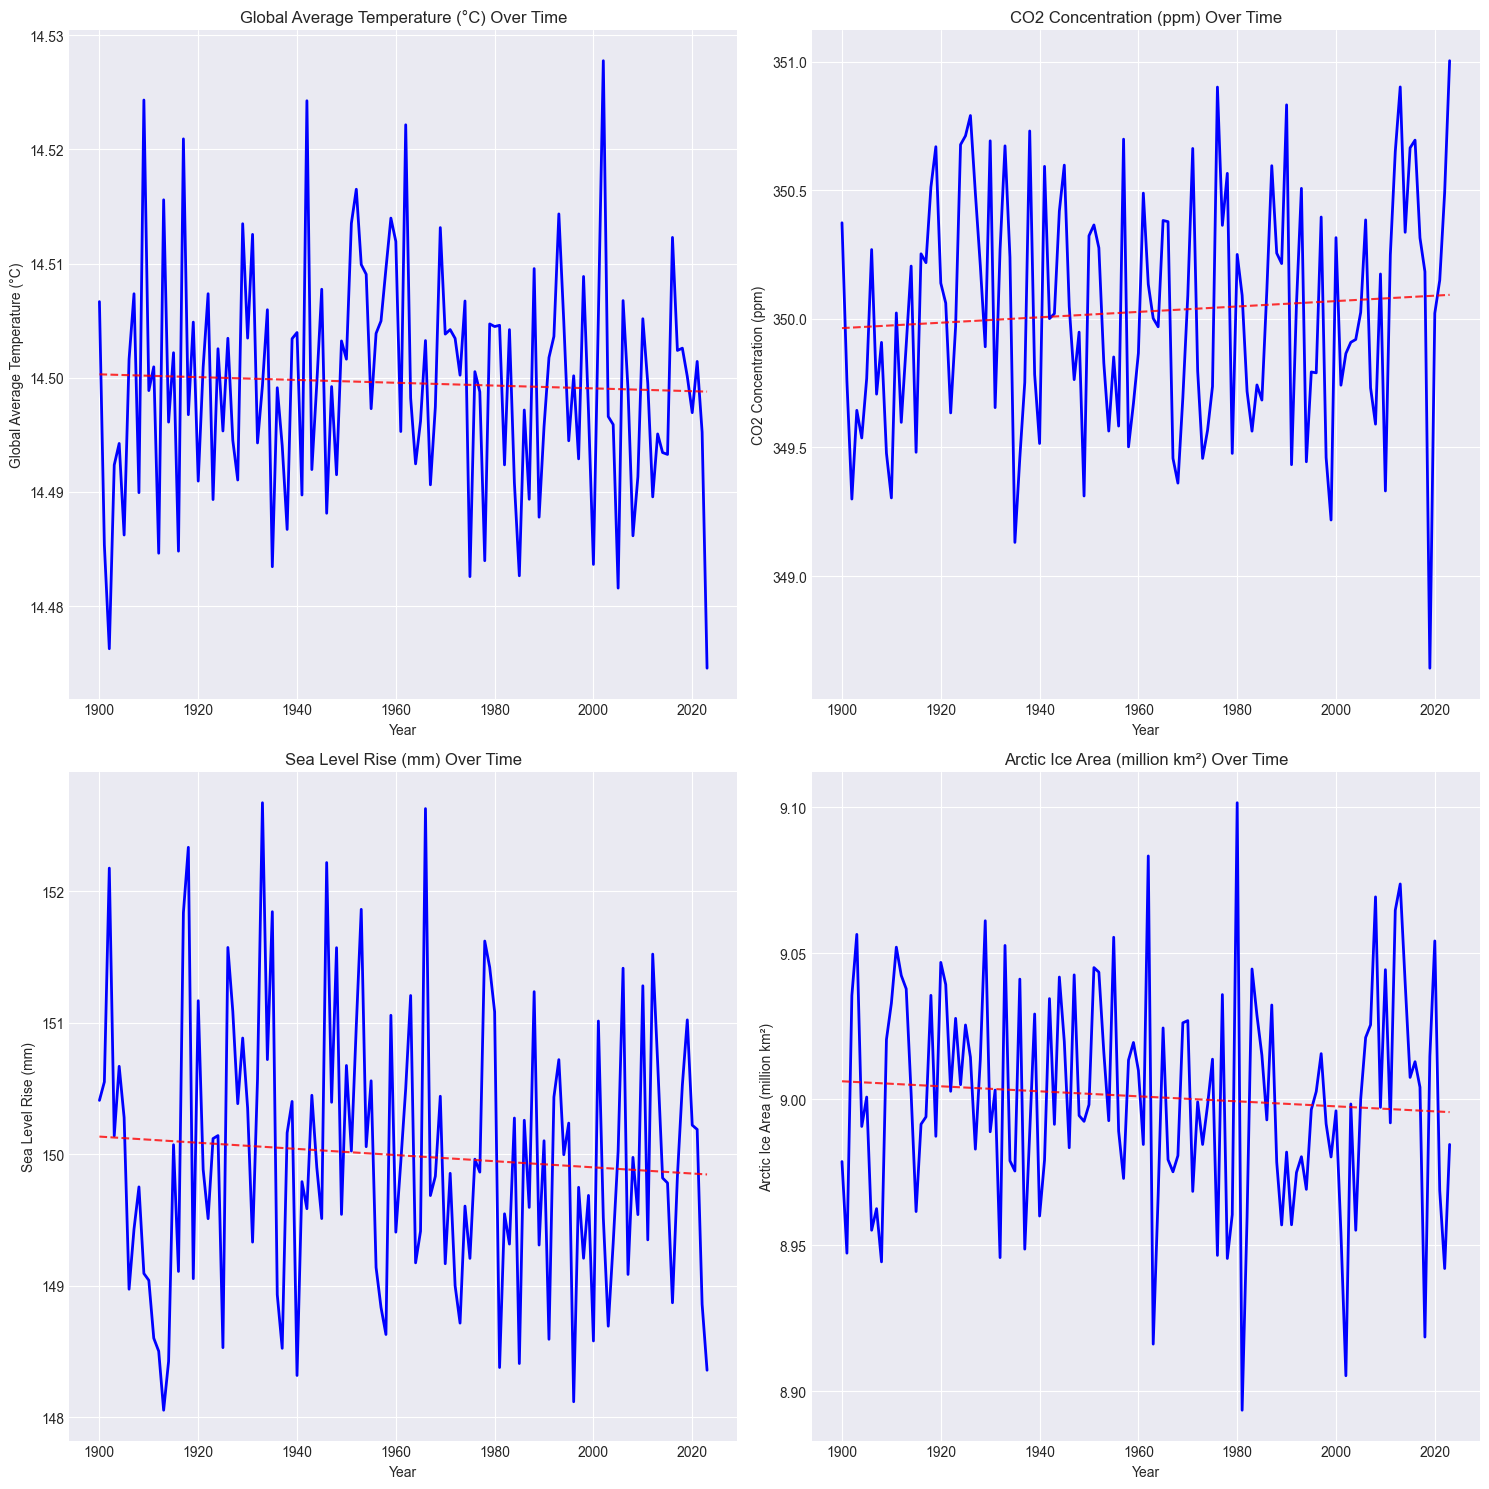

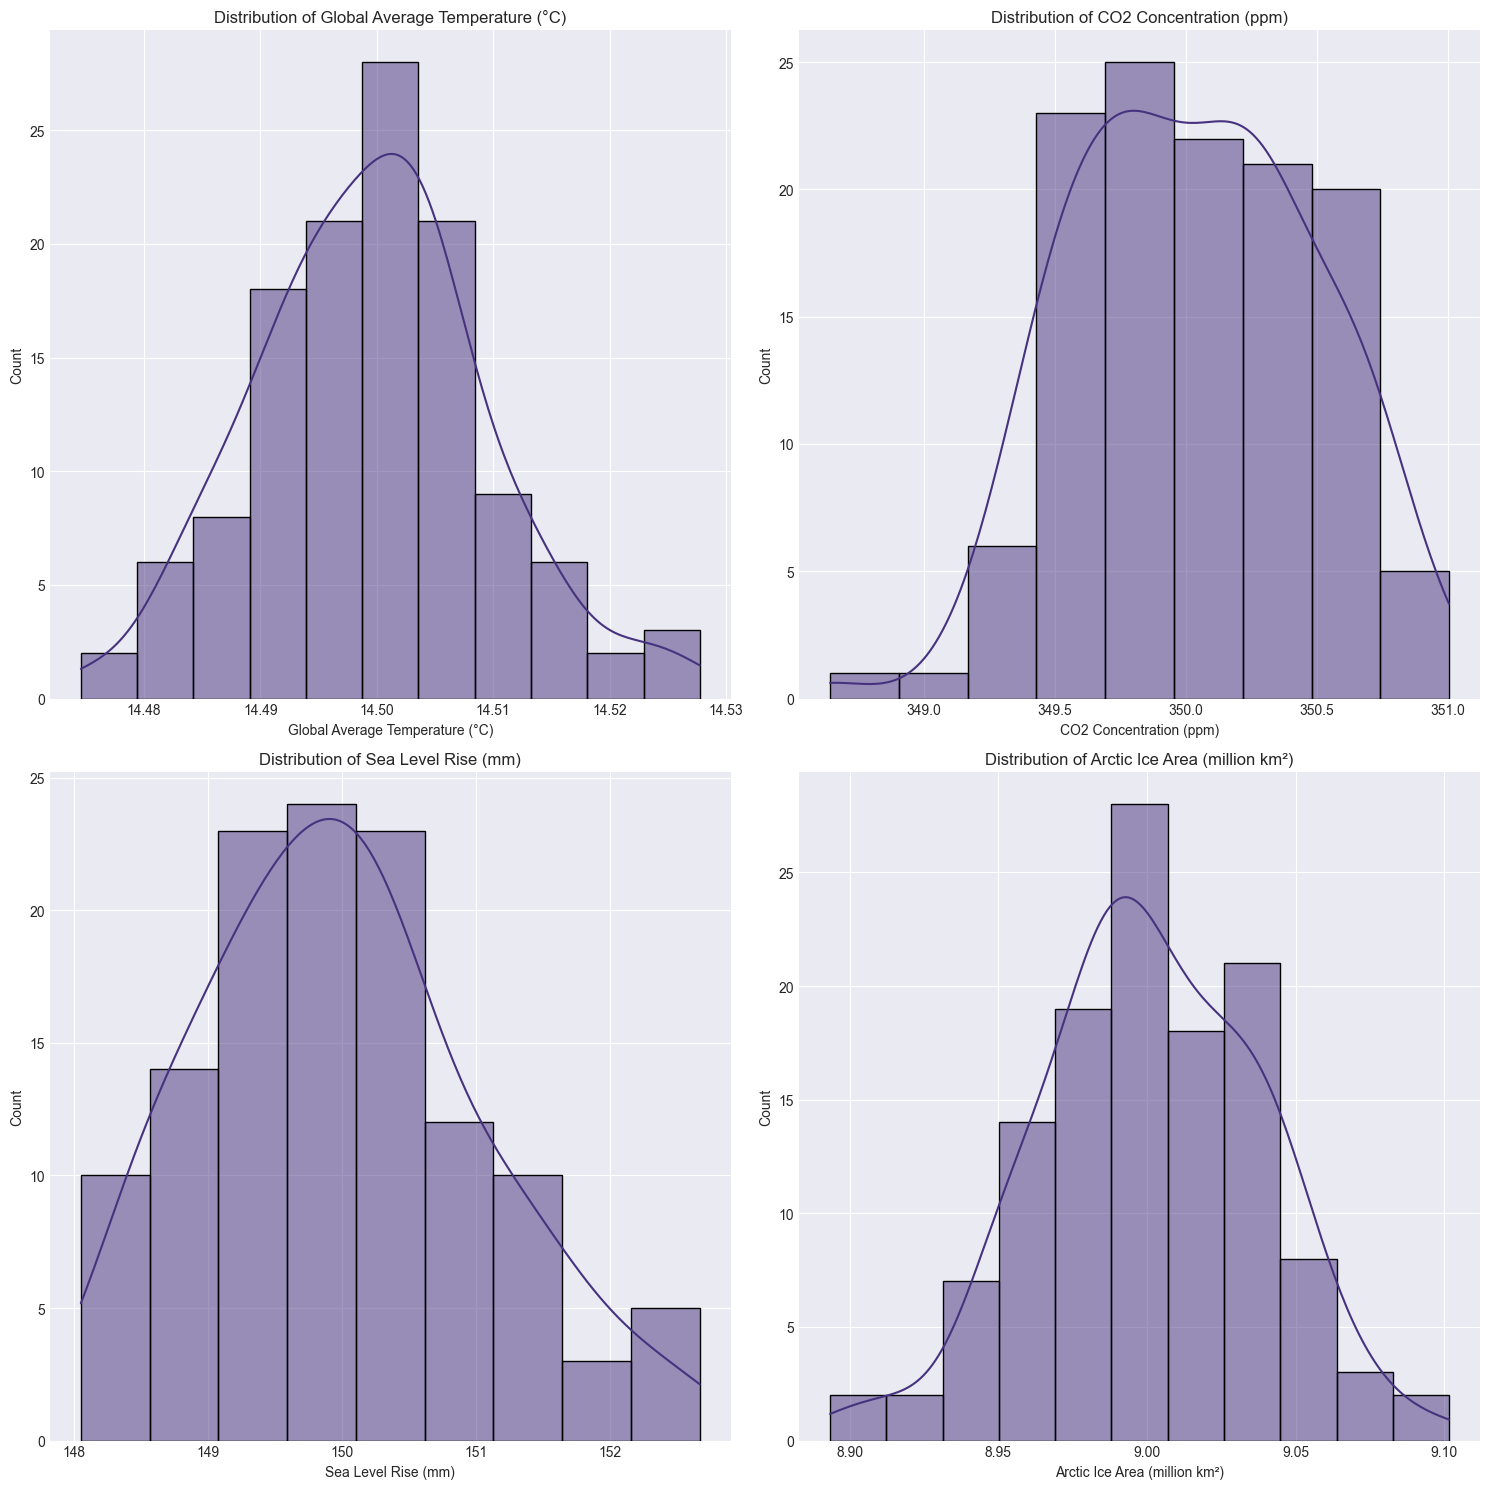

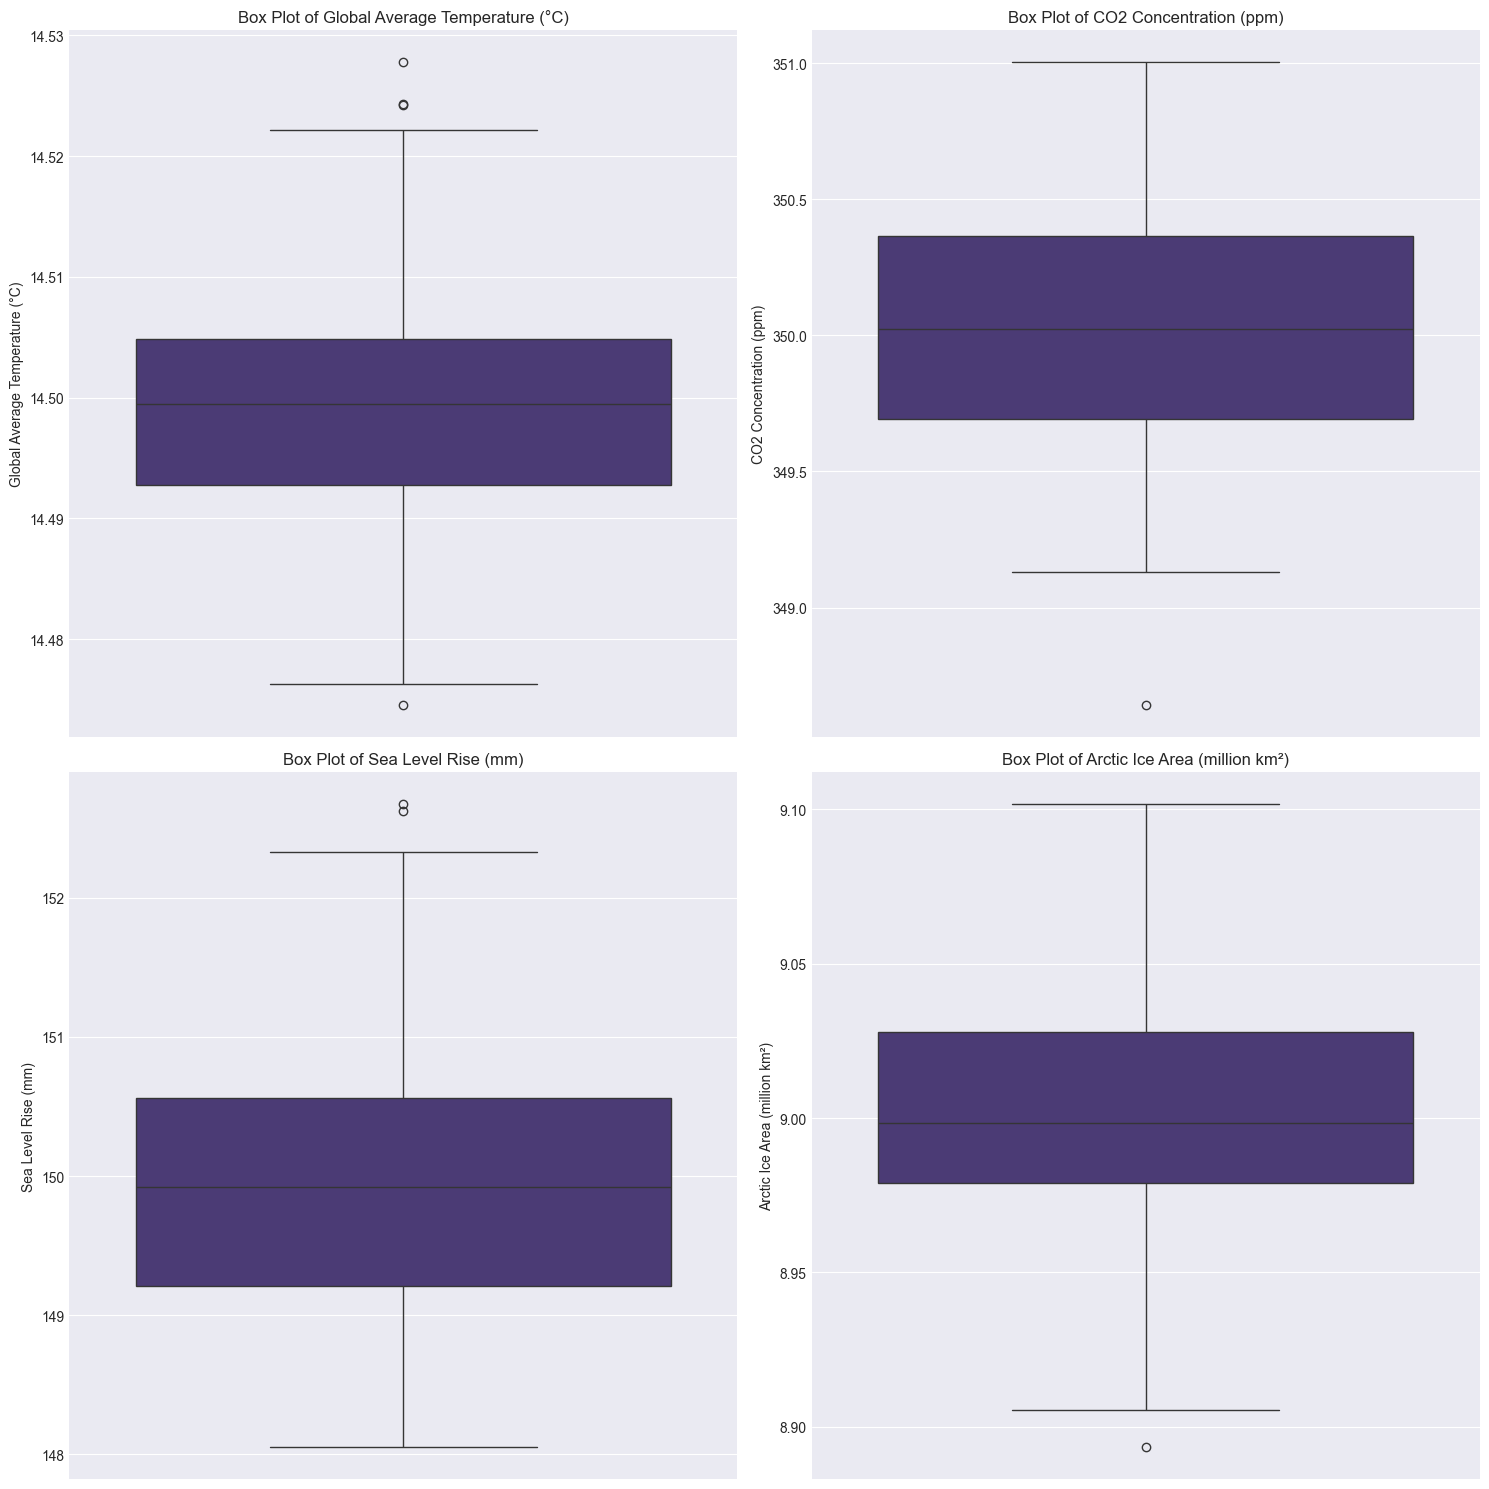

In [5]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
# Set up the plotting style and figure size
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 8]

# Calculate descriptive statistics for each variable
descriptive_stats = yearly_data.describe()
display(descriptive_stats)

# Create subplots for each climate variable
variables = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 
            'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, var in enumerate(variables):
    # Time series plot
    axes[idx].plot(yearly_data['Year'], yearly_data[var], color='blue', linewidth=2)
    axes[idx].set_title(f'{var} Over Time')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(var)
    
    # Add trend line
    z = np.polyfit(yearly_data['Year'], yearly_data[var], 1)
    p = np.poly1d(z)
    axes[idx].plot(yearly_data['Year'], p(yearly_data['Year']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Create distribution plots for each variable
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, var in enumerate(variables):
    # Histogram with KDE
    sns.histplot(data=yearly_data, x=var, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Create box plots for each variable
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, var in enumerate(variables):
    # Box plot
    sns.boxplot(data=yearly_data, y=var, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

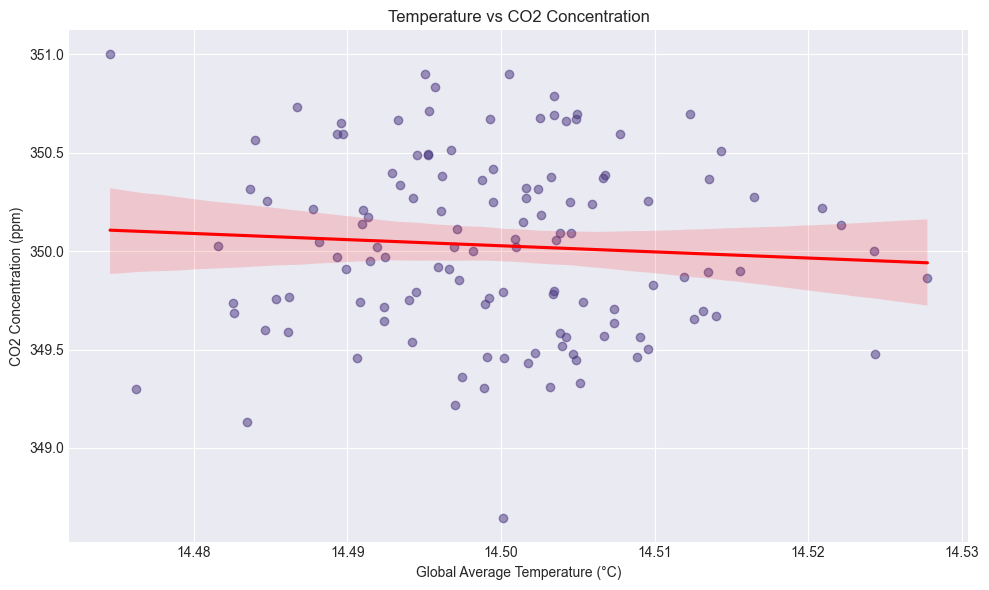

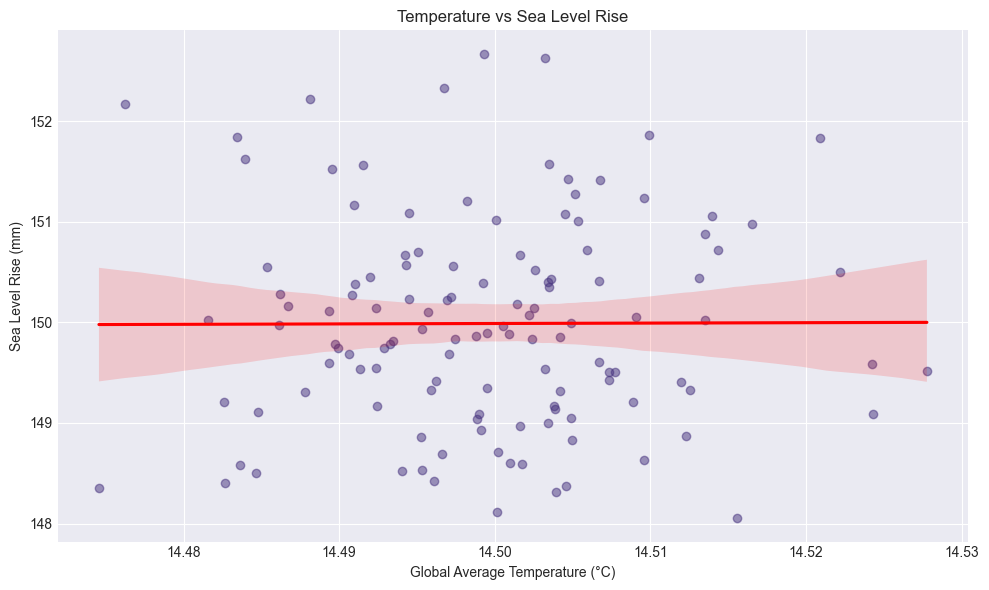

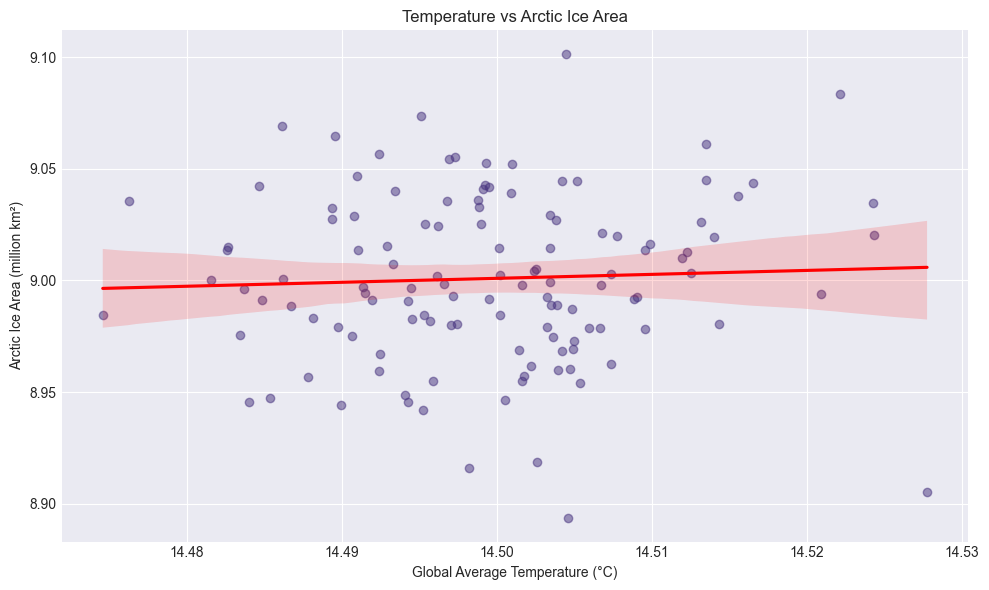

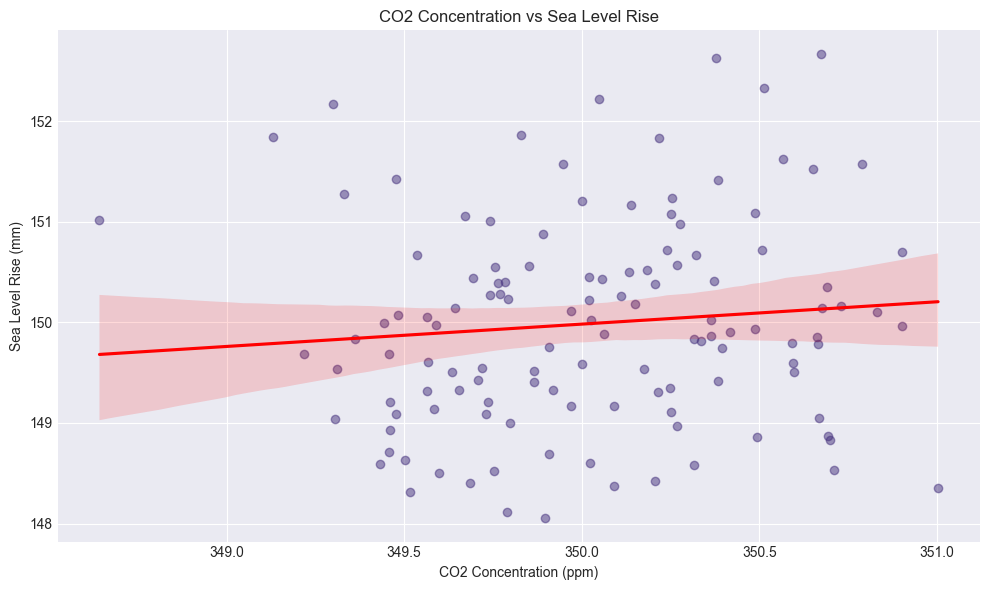

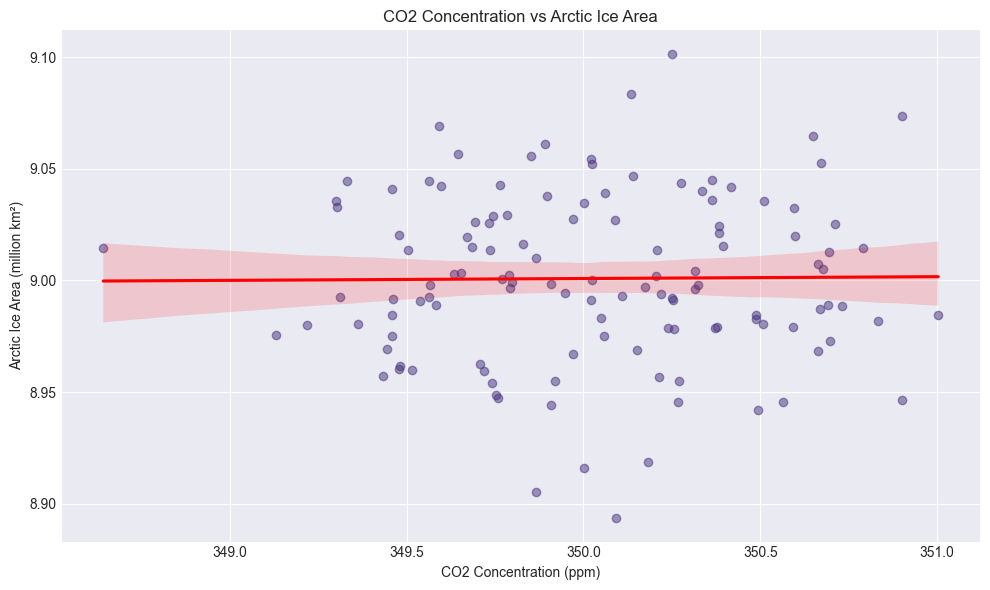

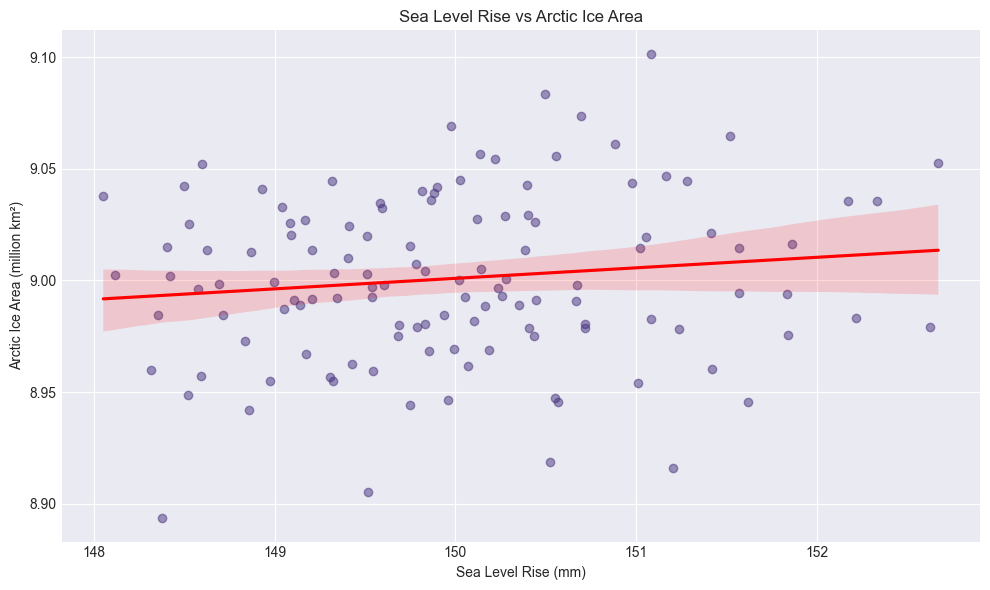

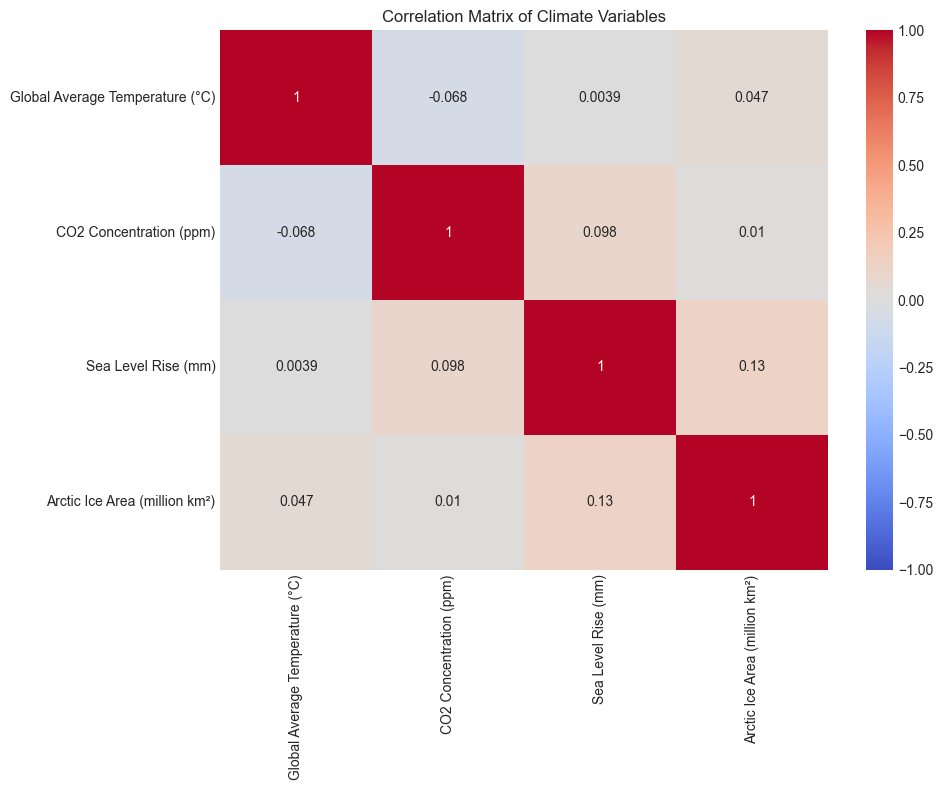

In [6]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here


# Set the style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Temperature vs CO2
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data, 
            x='Global Average Temperature (°C)', 
            y='CO2 Concentration (ppm)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Temperature vs CO2 Concentration')
plt.tight_layout()
plt.show()

# 2. Temperature vs Sea Level
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data,
            x='Global Average Temperature (°C)',
            y='Sea Level Rise (mm)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Temperature vs Sea Level Rise')
plt.tight_layout()
plt.show()

# 3. Temperature vs Arctic Ice
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data,
            x='Global Average Temperature (°C)',
            y='Arctic Ice Area (million km²)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Temperature vs Arctic Ice Area')
plt.tight_layout()
plt.show()

# 4. CO2 vs Sea Level
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data,
            x='CO2 Concentration (ppm)',
            y='Sea Level Rise (mm)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('CO2 Concentration vs Sea Level Rise')
plt.tight_layout()
plt.show()

# 5. CO2 vs Arctic Ice
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data,
            x='CO2 Concentration (ppm)',
            y='Arctic Ice Area (million km²)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('CO2 Concentration vs Arctic Ice Area')
plt.tight_layout()
plt.show()

# 6. Sea Level vs Arctic Ice
plt.figure(figsize=(10, 6))
sns.regplot(data=yearly_data,
            x='Sea Level Rise (mm)',
            y='Arctic Ice Area (million km²)',
            scatter_kws={'alpha':0.5},
            line_kws={'color': 'red'})
plt.title('Sea Level Rise vs Arctic Ice Area')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = yearly_data.iloc[:, 1:].corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0)
plt.title('Correlation Matrix of Climate Variables')
plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

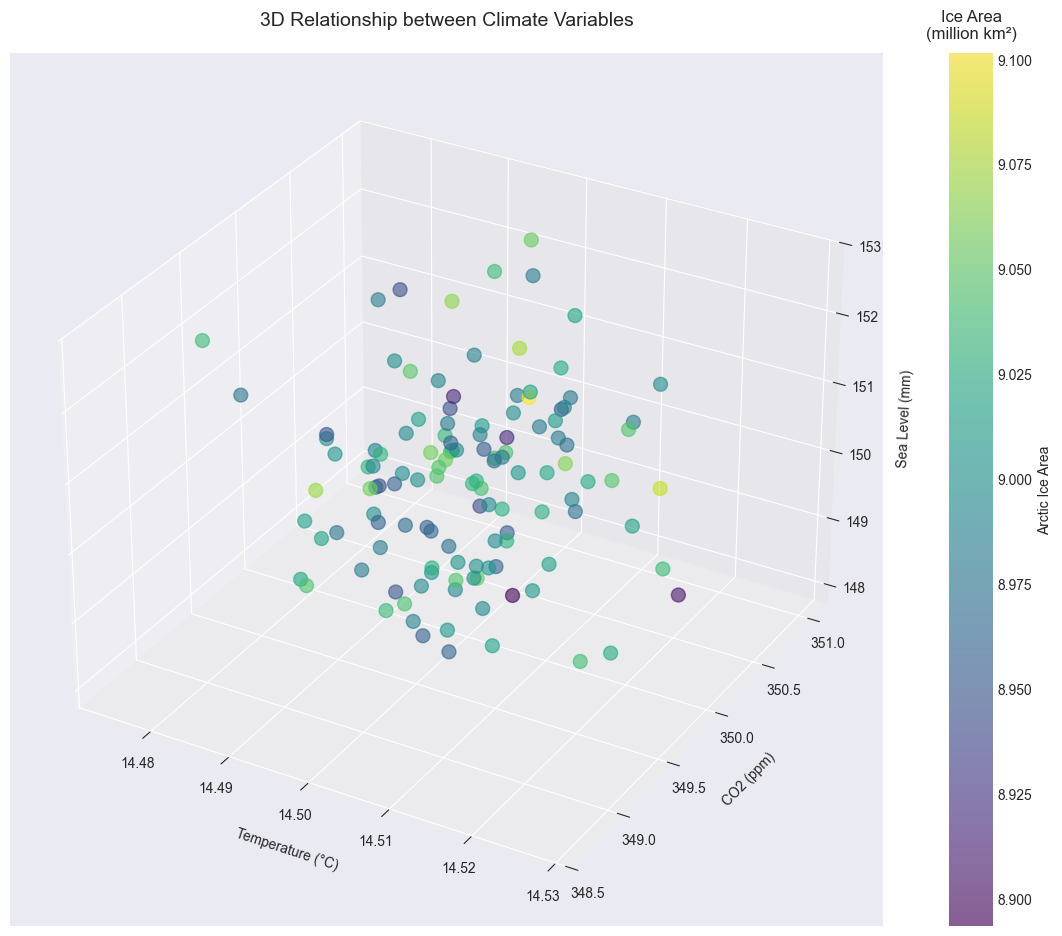

C:\Users\ujwal\AppData\Local\Temp\ipykernel_268\2927991560.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)


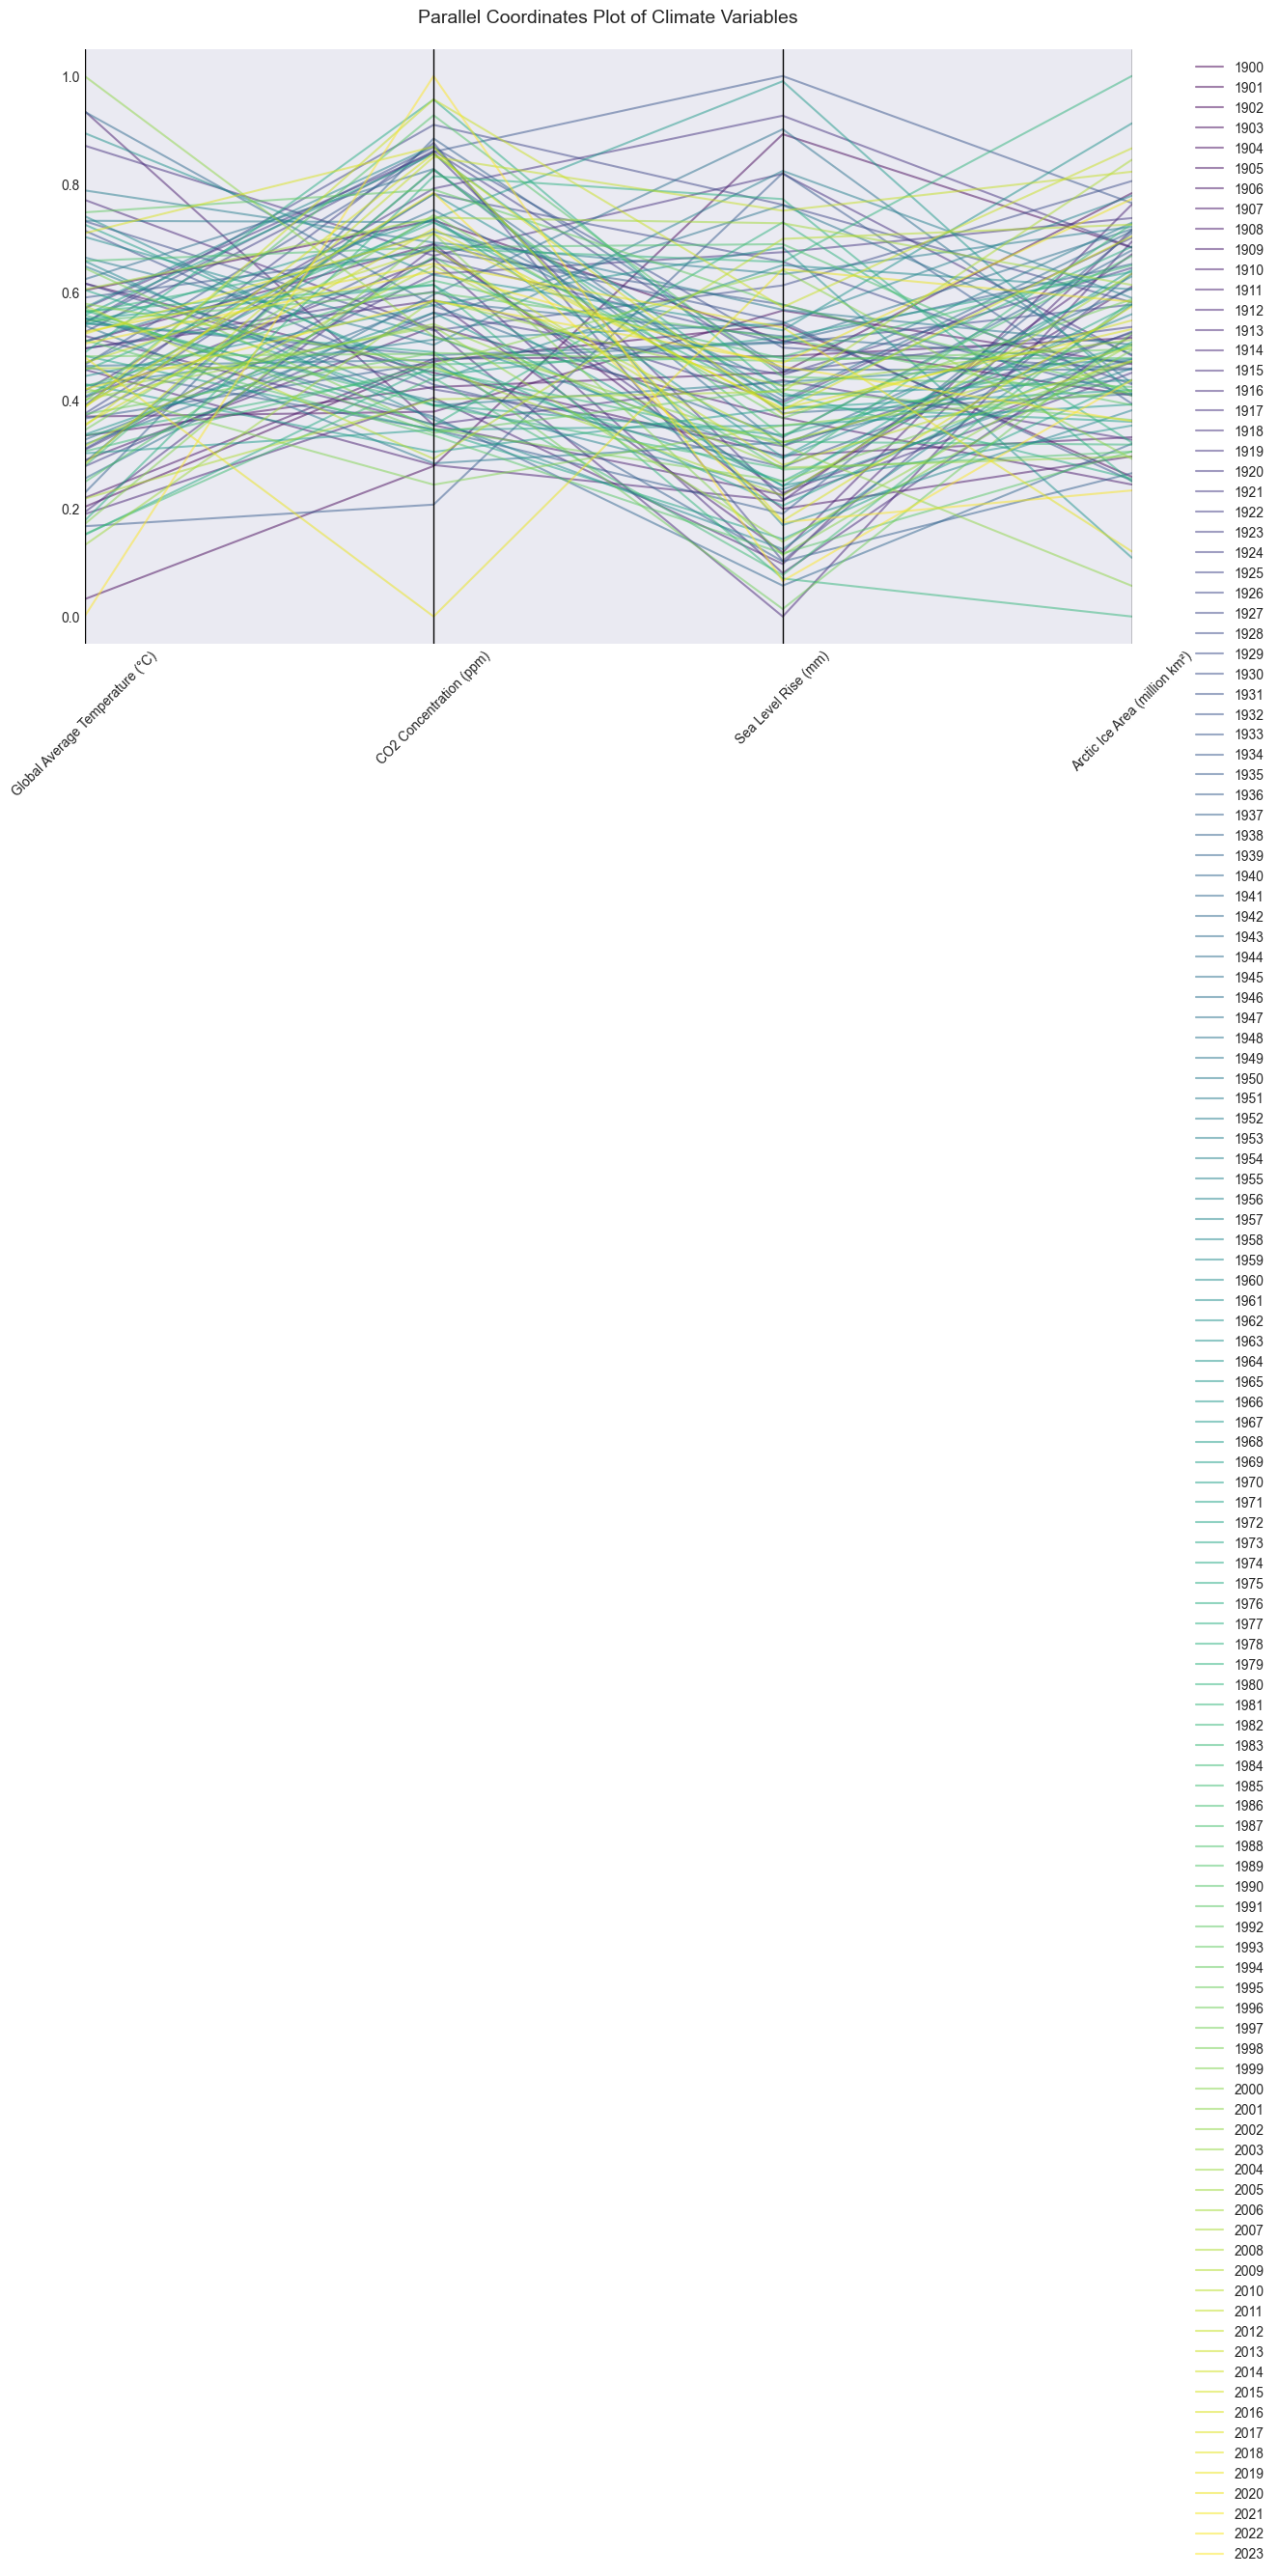

C:\Users\ujwal\AppData\Local\Temp\ipykernel_268\2927991560.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)


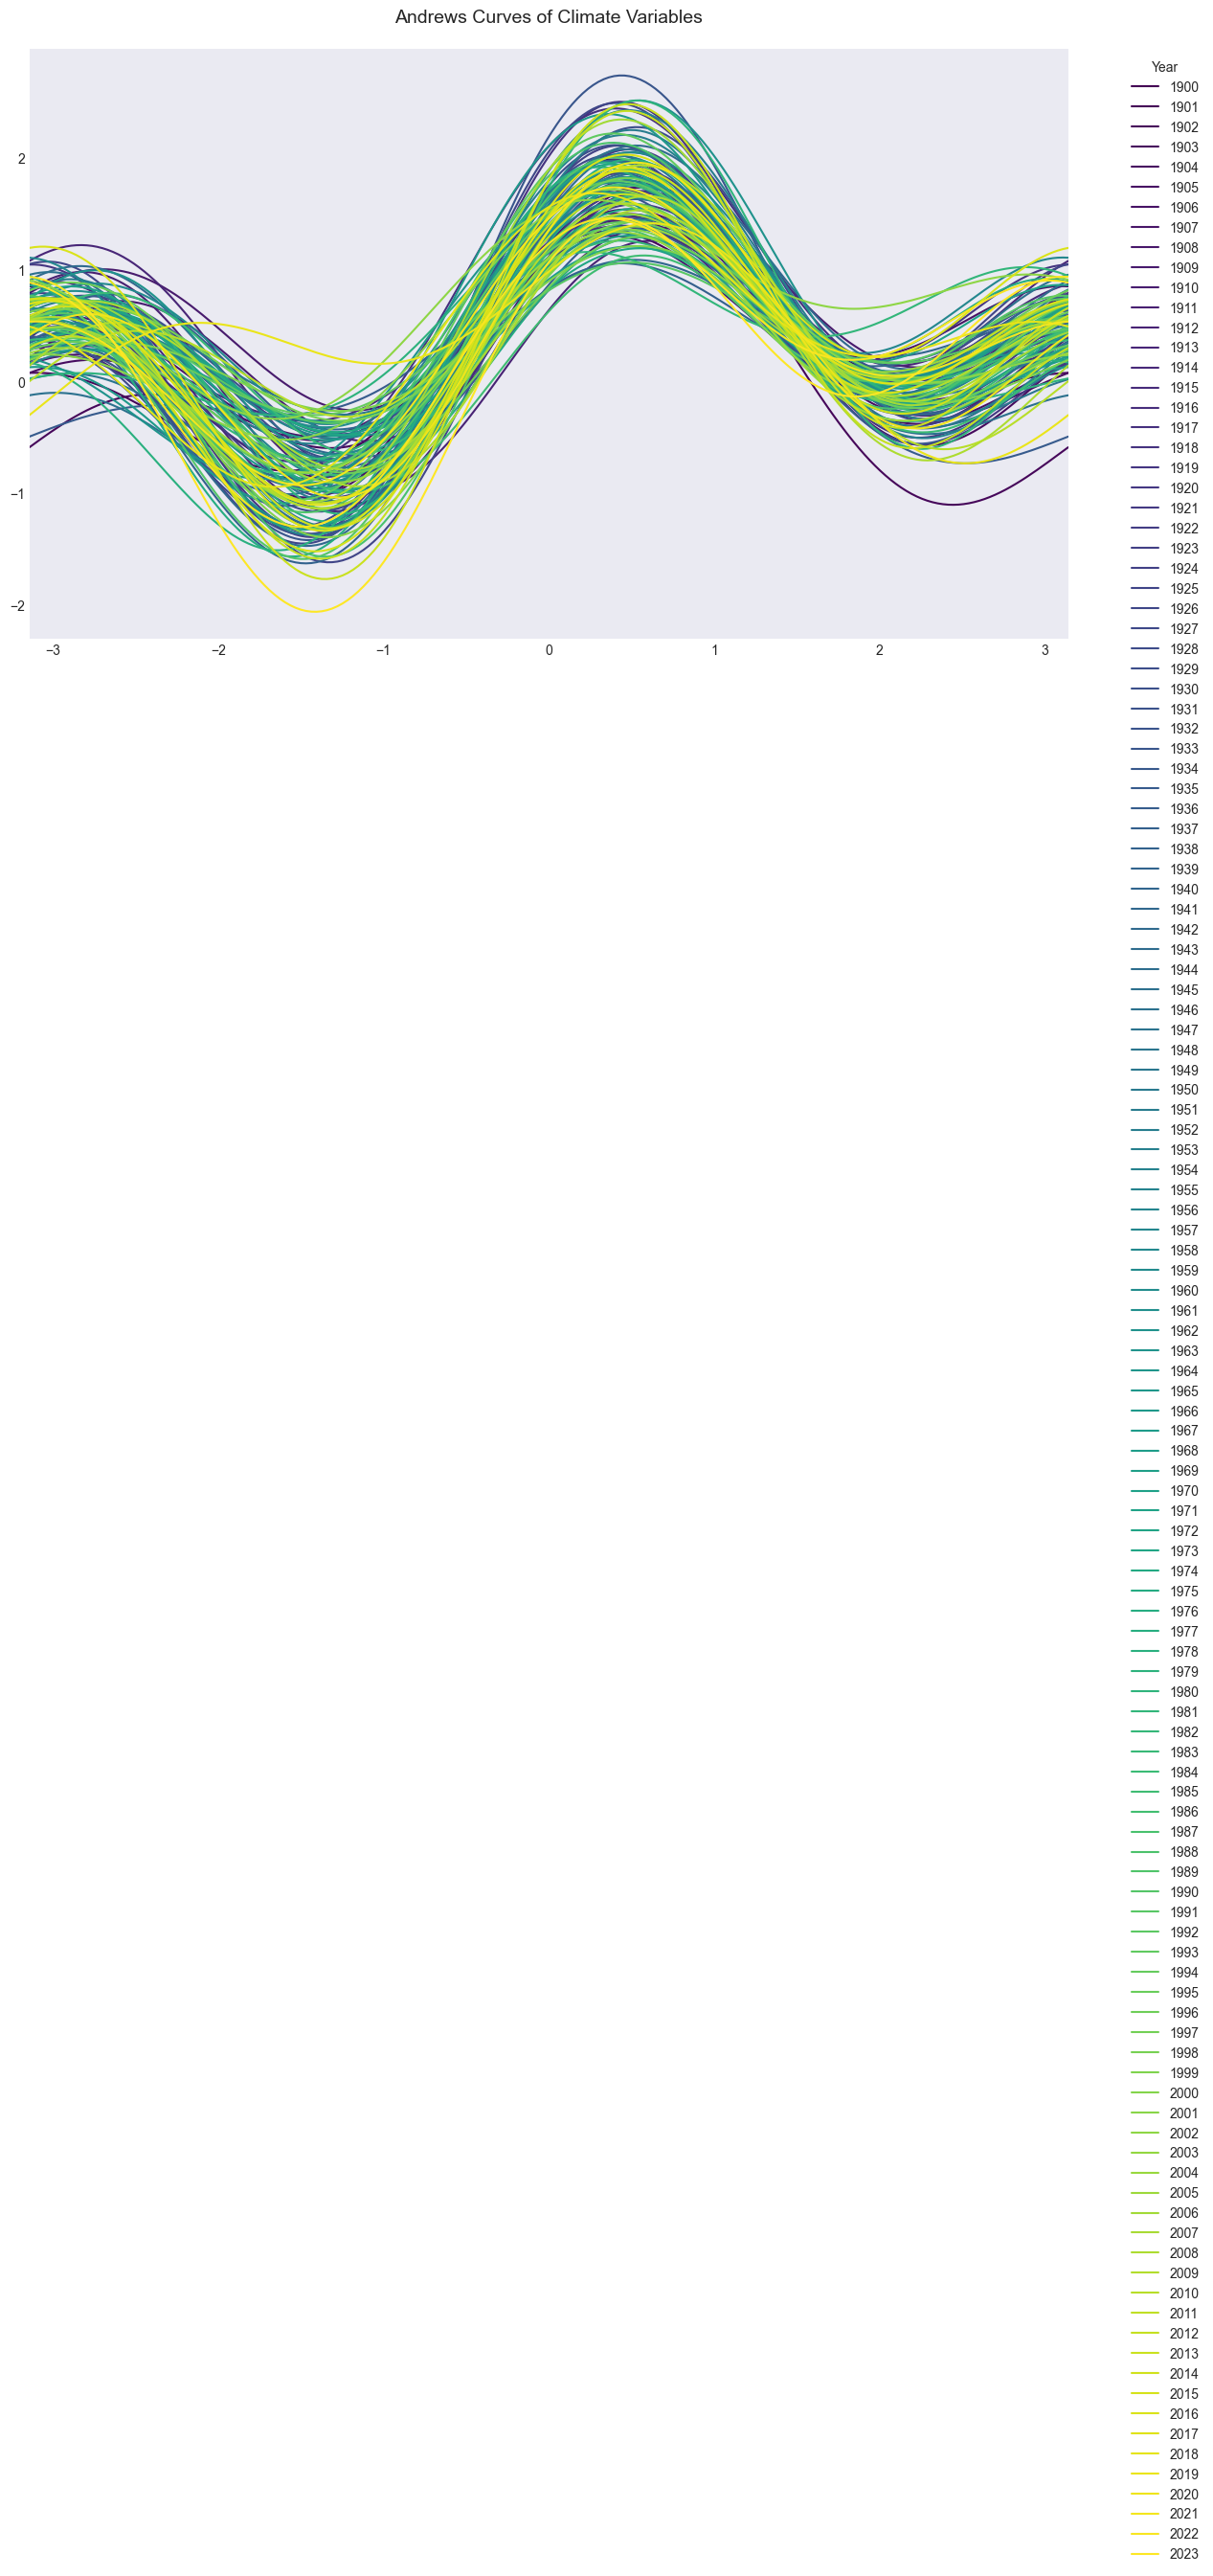

In [8]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

from pandas.plotting import parallel_coordinates, andrews_curves

# Set the style and figure size
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.autolayout'] = True

# 1. 3D Scatter Plot with improved layout
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(yearly_data['Global Average Temperature (°C)'],
                    yearly_data['CO2 Concentration (ppm)'],
                    yearly_data['Sea Level Rise (mm)'],
                    c=yearly_data['Arctic Ice Area (million km²)'],
                    cmap='viridis',
                    s=100,  # Increased marker size
                    alpha=0.6)  # Added transparency

ax.set_xlabel('Temperature (°C)', labelpad=10)
ax.set_ylabel('CO2 (ppm)', labelpad=10)
ax.set_zlabel('Sea Level (mm)', labelpad=10)
cbar = plt.colorbar(scatter, label='Arctic Ice Area')
cbar.ax.set_title('Ice Area\n(million km²)', pad=10)
plt.title('3D Relationship between Climate Variables', pad=20, size=14)
plt.tight_layout(pad=3.0)
plt.show()

# 2. Enhanced Parallel Coordinates Plot
# Normalize the data
normalized_data = yearly_data.copy()
columns_to_normalize = ['Global Average Temperature (°C)', 
                       'CO2 Concentration (ppm)', 
                       'Sea Level Rise (mm)', 
                       'Arctic Ice Area (million km²)']

for column in columns_to_normalize:
    normalized_data[column] = (yearly_data[column] - yearly_data[column].min()) / \
                            (yearly_data[column].max() - yearly_data[column].min())

plt.figure(figsize=(14, 8))
parallel_coordinates(normalized_data, 'Year', 
                    colormap=plt.cm.viridis,
                    alpha=0.5)  # Added transparency
plt.title('Parallel Coordinates Plot of Climate Variables', pad=20, size=14)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2.0)
plt.show()

# 3. Enhanced Andrews Curves
plt.figure(figsize=(14, 8))
andrews_curves(normalized_data, 'Year', 
              colormap=plt.cm.viridis)
plt.title('Andrews Curves of Climate Variables', pad=20, size=14)
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left',
          title='Year')
plt.tight_layout(pad=2.0)
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here